In [81]:
import numpy as np # used to perform operations with arrays and numbers
import pandas as pd # used to read the data
import seaborn as sns # used to draw heatmap
import matplotlib.pyplot as plt # used to plot different types of graphs
%matplotlib inline
from sklearn.model_selection import train_test_split # train the data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics # import for r squared error


EDA

In [2]:
# loading the data from csv file to pandas dataframe
cars_dataset = pd.read_csv('cars prediction project.csv')

In [3]:
# inspecting the 1st five rows of the dataframe
cars_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# checking the number of rows and column(9)
cars_dataset.shape


(301, 9)

In [5]:
# getting some information about the dataset like datatype how many columns memory usage
cars_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# checking the number of missing values
cars_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Handling outlier

C:\Users\91721\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price'>

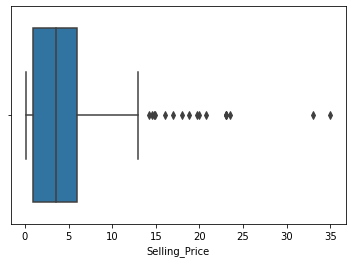

In [7]:
sns.boxplot(cars_dataset['Selling_Price']) # we see the outliers using this, outlier means which does not follow any pattern

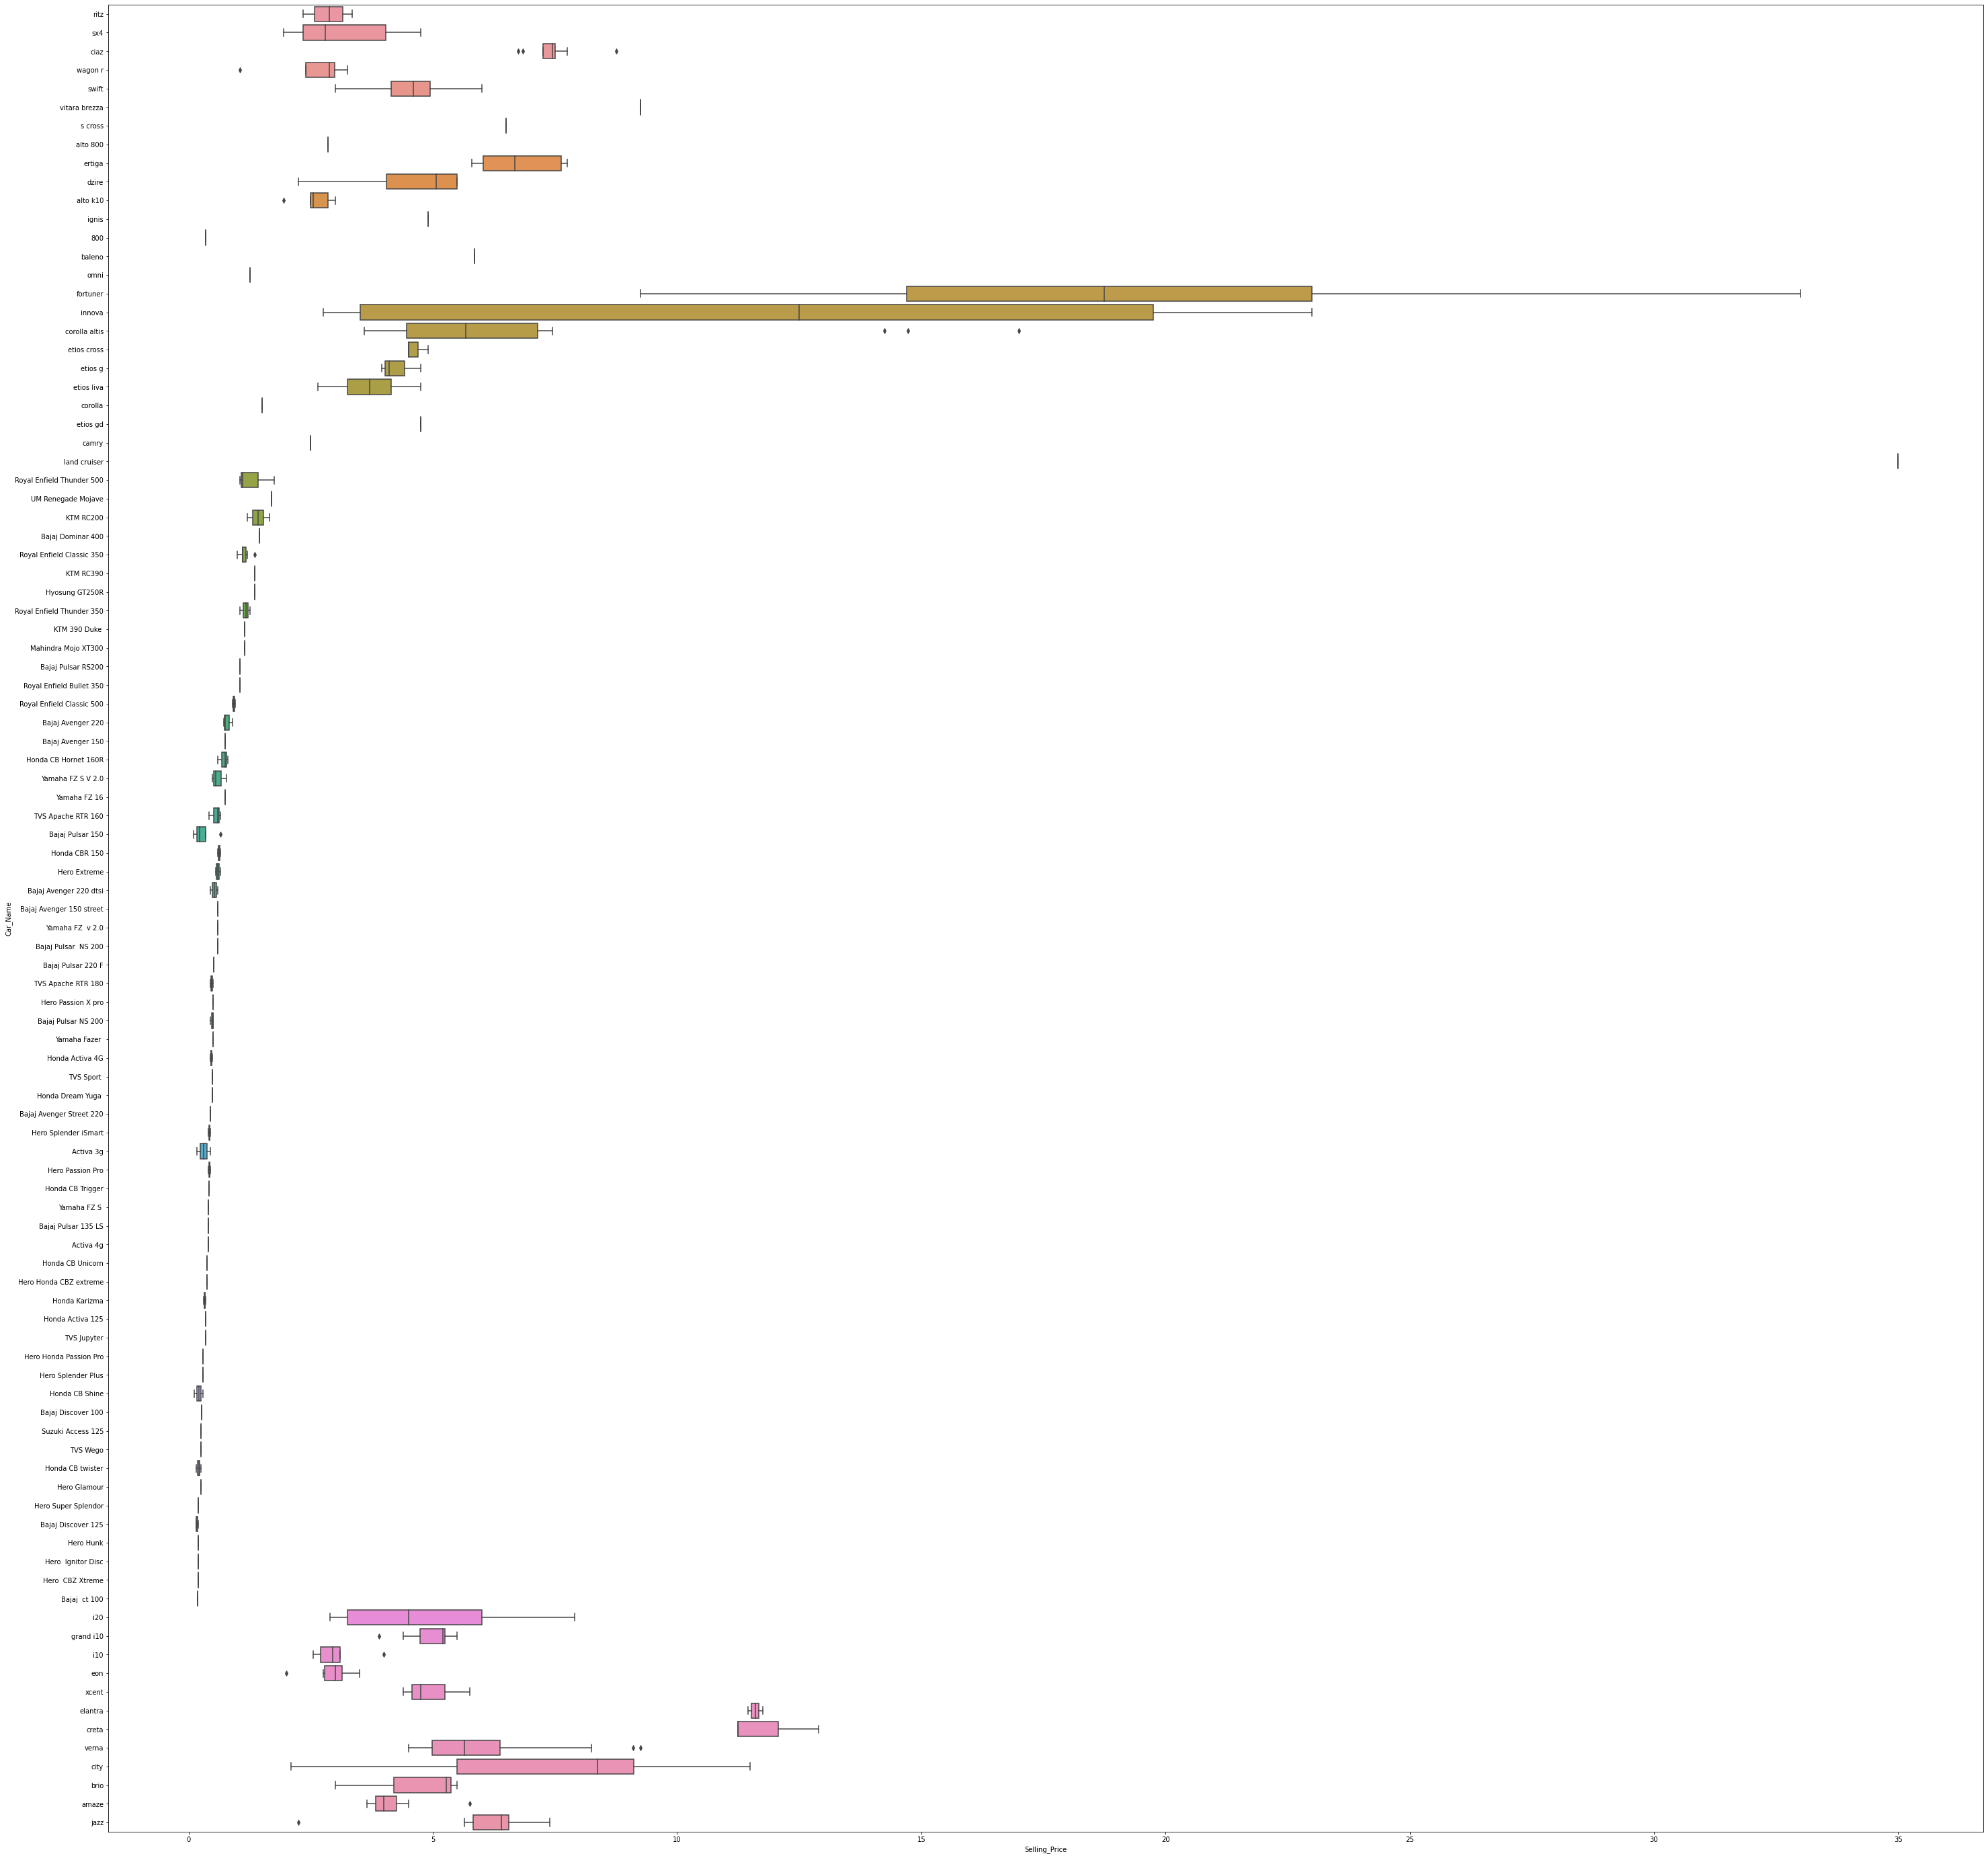

In [8]:
plt.figure(figsize=(50,50))
sns.boxplot(data=cars_dataset,x='Selling_Price',y='Car_Name')
plt.show() # show all outlires with individual name

from above here we remove all the outliers

In [9]:
cars_dataset[(cars_dataset['Car_Name']=='wagon r')&(cars_dataset['Selling_Price']<2)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
47,wagon r,2006,1.05,4.15,65000,Petrol,Dealer,Manual,0


In [10]:
cars_dataset.drop(47,inplace=True)# above we see 47 has outlier so we drop 47, similarly check for others

In [11]:
cars_dataset[(cars_dataset['Car_Name']=='ciaz')&(cars_dataset['Selling_Price']<7)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
11,ciaz,2015,6.85,10.38,51000,Diesel,Dealer,Manual,0


In [12]:
cars_dataset.drop([6,11],inplace=True)

In [13]:
cars_dataset[(cars_dataset['Car_Name']=='ciaz')&(cars_dataset['Selling_Price']>8)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0


In [14]:
cars_dataset.drop(8,inplace=True)

In [15]:
cars_dataset[(cars_dataset['Car_Name']=='alto k10')&(cars_dataset['Selling_Price']<3)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
20,alto k10,2016,2.85,3.95,25000,Petrol,Dealer,Manual,0
23,alto k10,2014,2.50,3.46,45280,Petrol,Dealer,Manual,0
28,alto k10,2010,1.95,3.95,44542,Petrol,Dealer,Manual,0
41,alto k10,2014,2.55,3.98,46706,Petrol,Dealer,Manual,0


In [16]:
cars_dataset.drop([20,23,28,41],inplace=True)

In [17]:
cars_dataset[(cars_dataset['Car_Name']=='corolla altis')&(cars_dataset['Selling_Price']>14)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
69,corolla altis,2016,14.25,20.91,12000,Petrol,Dealer,Manual,0
80,corolla altis,2016,14.73,14.89,23000,Diesel,Dealer,Manual,0
97,corolla altis,2017,17.00,18.64,8700,Petrol,Dealer,Manual,0


In [18]:
cars_dataset.drop([69,80,97],inplace=True)

In [19]:
cars_dataset[(cars_dataset['Car_Name']=='grand i10')&(cars_dataset['Selling_Price']>4)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
202,grand i10,2015,4.40,5.7,28200,Petrol,Dealer,Manual,0
205,grand i10,2016,5.25,5.7,3493,Petrol,Dealer,Manual,1
207,grand i10,2015,5.15,5.7,34797,Petrol,Dealer,Automatic,0
209,grand i10,2015,4.85,5.7,21125,Diesel,Dealer,Manual,0
214,grand i10,2017,5.25,5.7,20114,Petrol,Dealer,Manual,0
226,grand i10,2015,5.25,5.7,24678,Petrol,Dealer,Manual,0
234,grand i10,2015,5.50,5.7,4492,Petrol,Dealer,Manual,0


In [20]:
cars_dataset.drop([205,207,214,226,234],inplace=True)

In [21]:
cars_dataset[(cars_dataset['Car_Name']=='i10')&(cars_dataset['Selling_Price']>3)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
210,i10,2012,3.1,4.6,35775,Petrol,Dealer,Manual,0
248,i10,2013,4.0,4.6,30000,Petrol,Dealer,Manual,0


In [22]:
cars_dataset.drop([210,248],inplace=True)

In [23]:
cars_dataset[(cars_dataset['Car_Name']=='eon')&(cars_dataset['Selling_Price']<3)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
204,eon,2015,2.75,4.43,28282,Petrol,Dealer,Manual,0
216,eon,2016,2.90,4.43,12500,Petrol,Dealer,Manual,0
239,eon,2012,2.00,4.43,23709,Petrol,Dealer,Manual,0


In [24]:
cars_dataset.drop([204,216,239],inplace=True)

In [25]:
cars_dataset[(cars_dataset['Car_Name']=='verna')&(cars_dataset['Selling_Price']>8)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
223,verna,2015,8.25,9.4,61381,Diesel,Dealer,Manual,0
231,verna,2017,9.25,9.4,15001,Petrol,Dealer,Manual,0
235,verna,2017,9.10,9.4,15141,Petrol,Dealer,Manual,0


In [26]:
cars_dataset.drop([223,231,235],inplace=True)

In [27]:
cars_dataset[(cars_dataset['Car_Name']=='amaze')&(cars_dataset['Selling_Price']>4)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
287,amaze,2015,5.75,7.5,44000,Petrol,Dealer,Automatic,0
290,amaze,2014,4.50,6.4,19000,Petrol,Dealer,Manual,0


In [28]:
cars_dataset.drop(287,inplace=True)

In [29]:
cars_dataset.drop(273,inplace=True)

In [30]:
cars_dataset[(cars_dataset['Car_Name']=='jazz')&(cars_dataset['Selling_Price']>6)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
263,jazz,2016,6.6,7.7,16002,Petrol,Dealer,Manual,0
265,jazz,2017,6.5,8.7,21200,Petrol,Dealer,Manual,0
285,jazz,2016,7.4,8.5,15059,Petrol,Dealer,Automatic,0
292,jazz,2016,6.4,8.4,12000,Petrol,Dealer,Manual,0


In [31]:
cars_dataset.drop([263,265,285,292],inplace=True)

In [32]:
cars_dataset[(cars_dataset['Car_Name']=='Bajaj Pulsar 150')&(cars_dataset['Selling_Price']>0.2)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
135,Bajaj Pulsar 150,2015,0.65,0.74,5000,Petrol,Individual,Manual,0
184,Bajaj Pulsar 150,2008,0.25,0.75,26000,Petrol,Individual,Manual,1


In [33]:
cars_dataset.drop([135,184],inplace=True)

In [34]:
cars_dataset[(cars_dataset['Car_Name']=='Royal Enfield Classic 350')&(cars_dataset['Selling_Price']>1)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
104,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0
109,Royal Enfield Classic 350,2017,1.20,1.47,11000,Petrol,Individual,Manual,0
114,Royal Enfield Classic 350,2015,1.15,1.47,17000,Petrol,Individual,Manual,0
115,Royal Enfield Classic 350,2015,1.11,1.47,17500,Petrol,Individual,Manual,0
116,Royal Enfield Classic 350,2013,1.10,1.47,33000,Petrol,Individual,Manual,0
118,Royal Enfield Classic 350,2015,1.10,1.47,26000,Petrol,Individual,Manual,0


In [35]:
cars_dataset.drop([104,109,114,115,116,118],inplace=True)

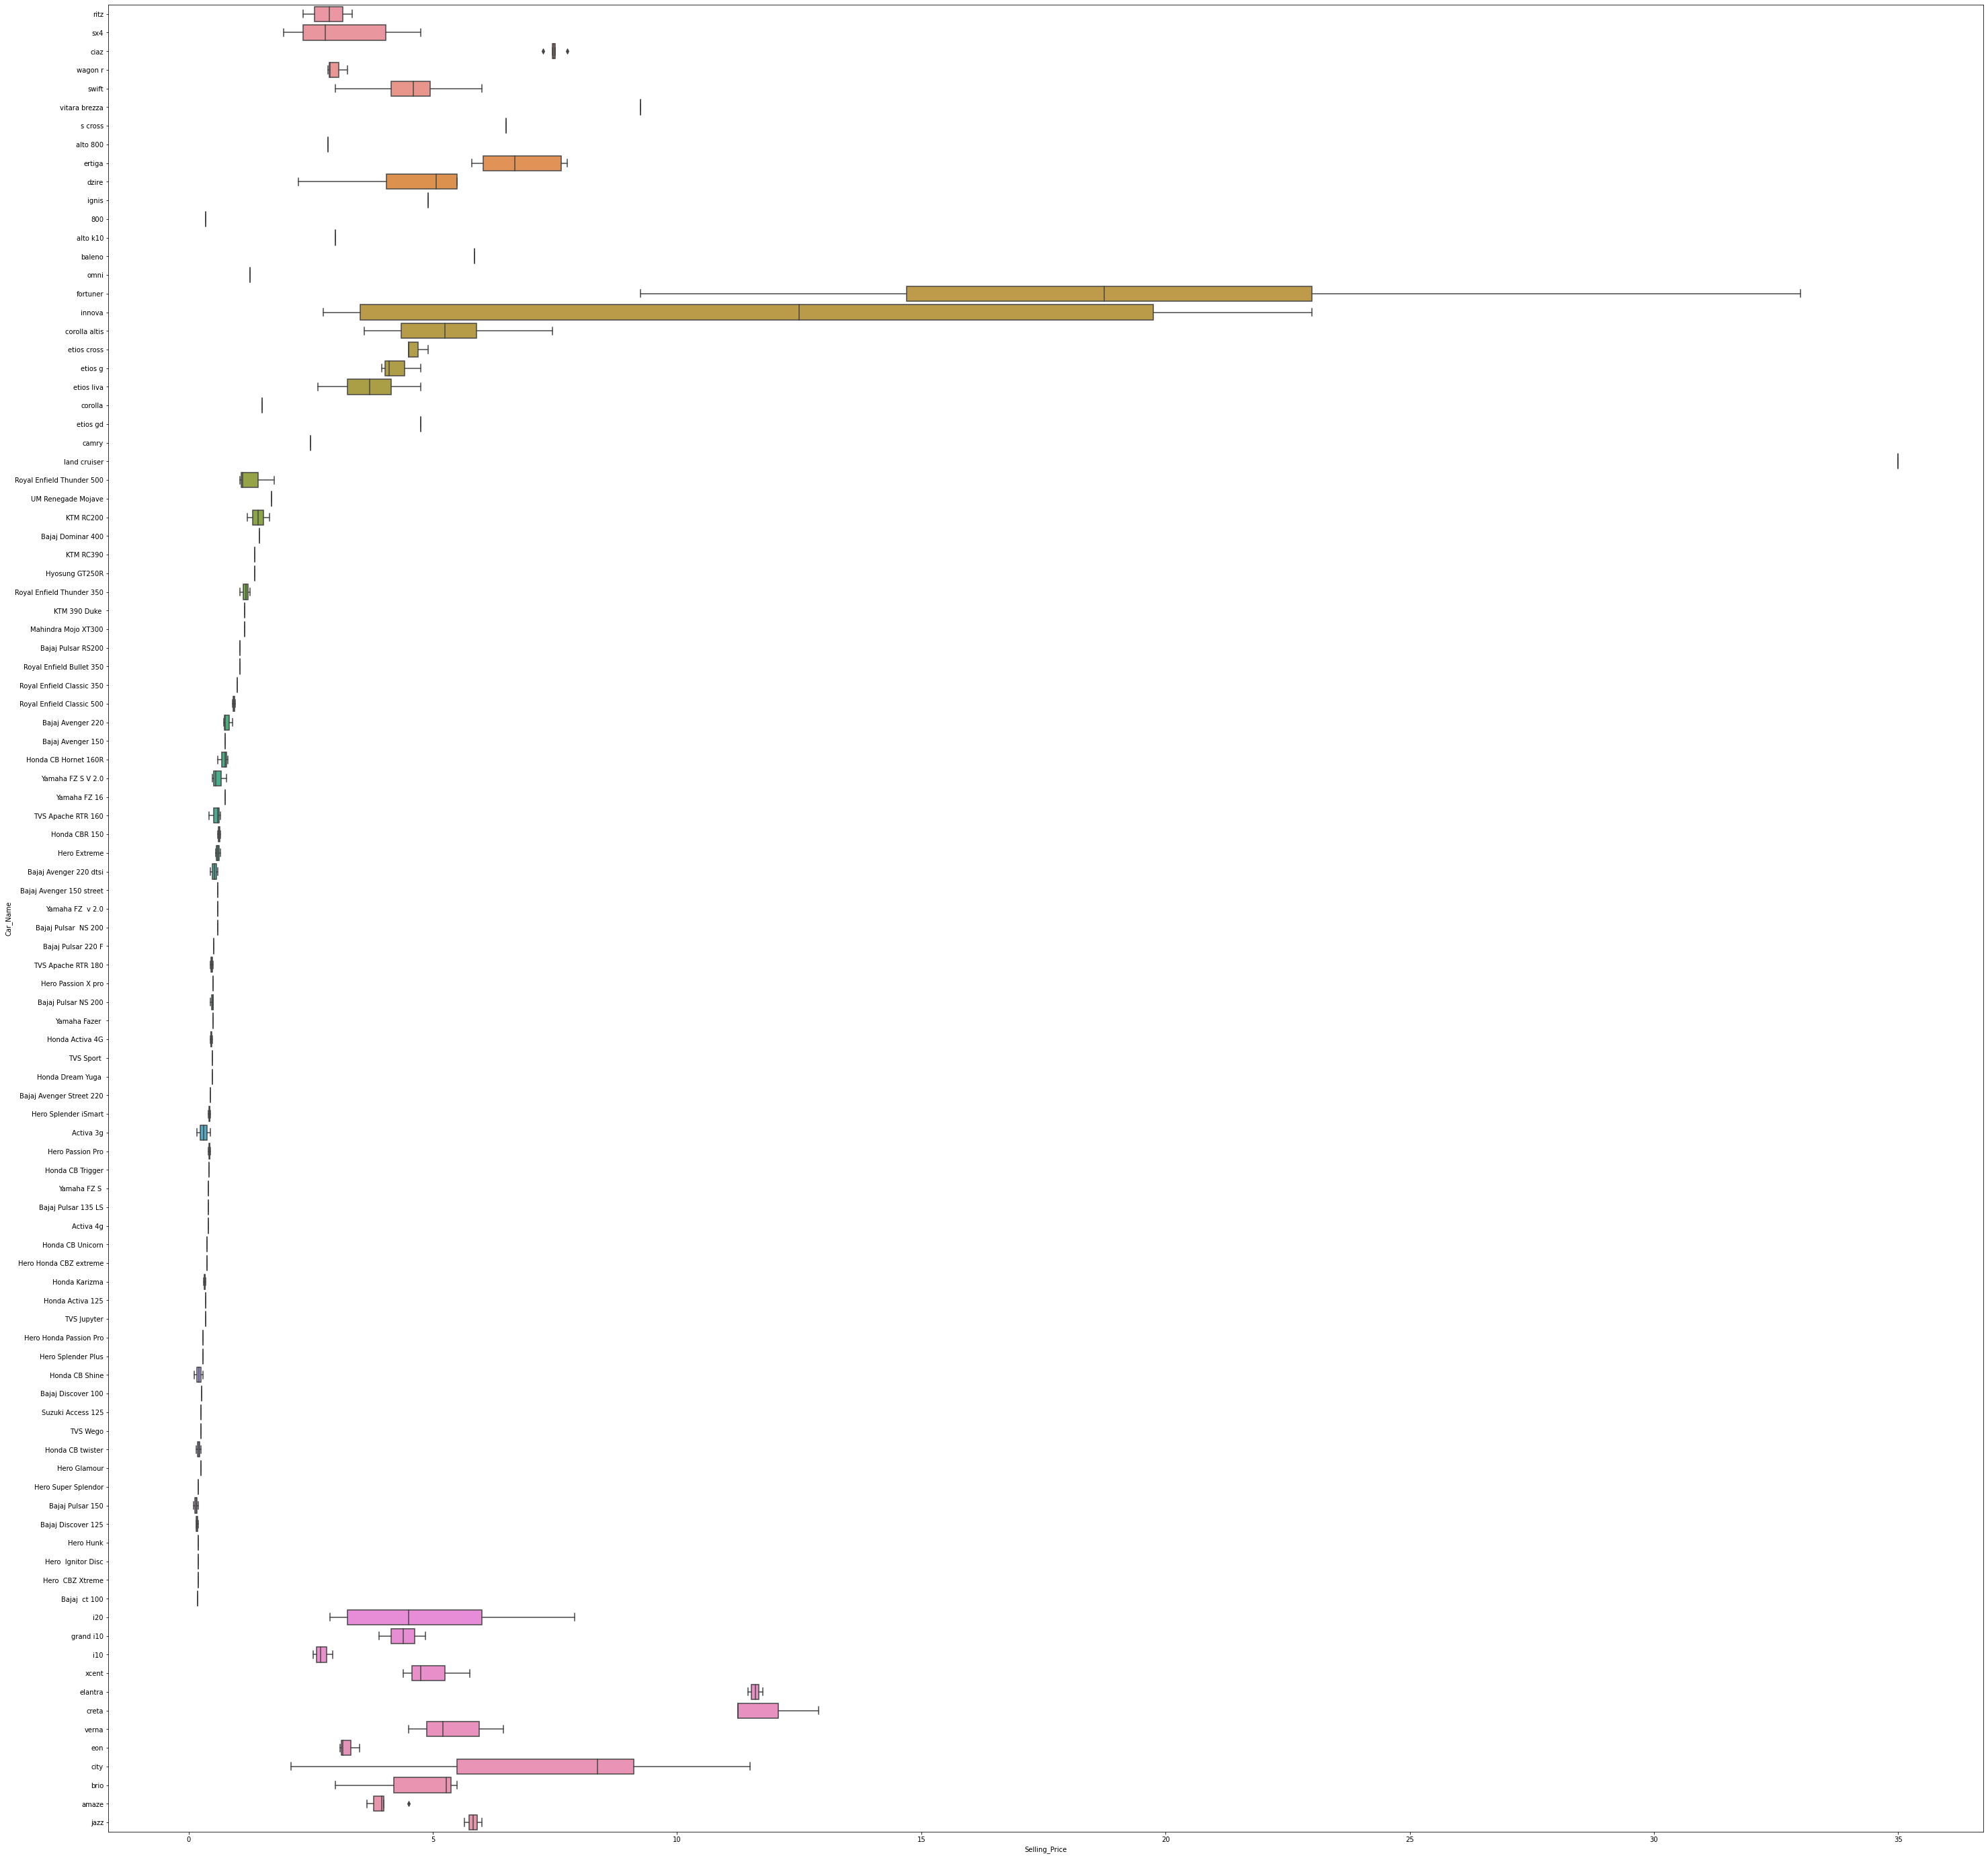

In [36]:
plt.figure(figsize=(50,50))
sns.boxplot(data=cars_dataset,x='Selling_Price',y='Car_Name')
plt.show()# here we check the outlier , so all the outliers are removed

Handling categorical data encoding

In [37]:
cars_dataset.select_dtypes(object)# show data which has categorical data

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual
...,...,...,...,...
296,city,Diesel,Dealer,Manual
297,brio,Petrol,Dealer,Manual
298,city,Petrol,Dealer,Manual
299,city,Diesel,Dealer,Manual


In [38]:
cars_cat=cars_dataset.select_dtypes(object)# it show data which has categorical data
cars_dataset.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       263 non-null    object 
 1   Year           263 non-null    int64  
 2   Selling_Price  263 non-null    float64
 3   Present_Price  263 non-null    float64
 4   Kms_Driven     263 non-null    int64  
 5   Fuel_Type      263 non-null    object 
 6   Seller_Type    263 non-null    object 
 7   Transmission   263 non-null    object 
 8   Owner          263 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 28.6+ KB


In [39]:
cars_num=cars_dataset.select_dtypes(['int64','float64'])# it show data which has numerical data
cars_dataset.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       263 non-null    object 
 1   Year           263 non-null    int64  
 2   Selling_Price  263 non-null    float64
 3   Present_Price  263 non-null    float64
 4   Kms_Driven     263 non-null    int64  
 5   Fuel_Type      263 non-null    object 
 6   Seller_Type    263 non-null    object 
 7   Transmission   263 non-null    object 
 8   Owner          263 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 28.6+ KB


apply one hot encoding

In [40]:
#pd.get_dummies(cars_cat['Car_Name']) # get dummies create lots of column so we use label encoding

apply label encoding

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() # import label encoder and store in le, label encoder create only one column

In [42]:
le=LabelEncoder()

In [43]:
le.fit_transform(cars_cat["Car_Name"])# fit the data

array([90, 93, 68, 96, 92, 95, 91, 68, 62, 68, 76, 73, 76, 76, 76, 96, 93,
       85, 93, 96, 92, 92, 92, 68, 90, 90, 92, 76, 73, 93, 73,  0, 63, 93,
       65, 93, 73, 89, 68, 90, 76, 68, 81, 81, 86, 81, 86, 71, 77, 71, 78,
       81, 71, 77, 81, 81, 81, 80, 86, 81, 71, 80, 71, 71, 80, 77, 78, 71,
       70, 71, 81, 79, 86, 86, 86, 67, 88, 71, 80, 78, 71, 86, 86, 81, 71,
       71, 86, 71, 81, 49, 56, 42, 11, 43, 40, 48, 48, 42, 48, 41, 44, 49,
       49, 17, 48, 45, 46, 47, 47,  6,  4, 32, 60, 32, 58,  6,  6, 51, 37,
       20, 32,  7, 37,  5, 57, 57, 12, 51, 20, 60, 15, 15, 52, 26, 16, 16,
       61, 31, 54, 60, 38, 31,  8, 52, 16,  7, 28,  1, 25, 51, 34, 28, 59,
       25, 13,  2, 35, 22, 39, 30, 53, 39, 23, 27, 33,  9, 50, 55, 36, 21,
       29, 14, 10, 24, 19, 18,  3,  1, 36, 10, 33, 14, 84, 82, 83, 97, 84,
       82, 74, 72, 84, 94, 75, 94, 94, 75, 84, 84, 94, 83, 83, 94, 84, 94,
       74, 82, 75, 72, 94, 94, 97, 97, 84, 94, 94, 84, 94, 84, 72, 69, 66,
       69, 69, 66, 69, 69

In [44]:
for col in cars_cat:
    le=LabelEncoder()
    cars_cat[col]=le.fit_transform(cars_cat[col]) # use for loop for all column to apply encoding
    

C:\Users\91721\AppData\Local\Temp/ipykernel_8868/2615266095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_cat[col]=le.fit_transform(cars_cat[col]) # use for loop for all column to apply encoding


In [45]:
cars_cat.head()# inspecting the 1st five rows of the dataframe of categorical data

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,90,2,0,1
1,93,1,0,1
2,68,2,0,1
3,96,2,0,1
4,92,1,0,1


Handling Skewness

In [46]:
cars_num.head()# inspecting the 1st five rows of the dataframe of numerical data

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0


data is normally distributed that means it is bell curve  but if it is not normally distributed it means it has skewness
two type of skewness:
positive skewness=tell is on positive side
negative skewness=tell is on negative side
skewness is apply on numerical column so we separate numerical and categorical data (above)

In [47]:
from scipy.stats import skew # import for skewness

C:\Users\91721\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Year
-1.191788284011251


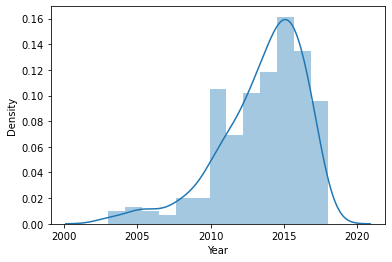

Selling_Price
2.5540266053096037


C:\Users\91721\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


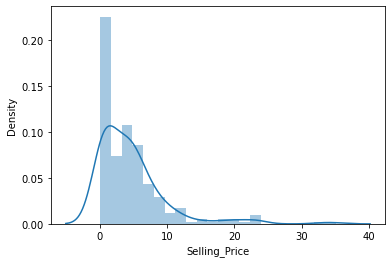

Present_Price
3.9498534373018623


C:\Users\91721\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


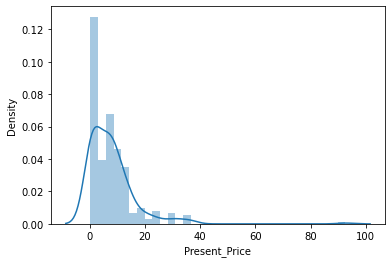

C:\Users\91721\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Kms_Driven
6.2030418537499035


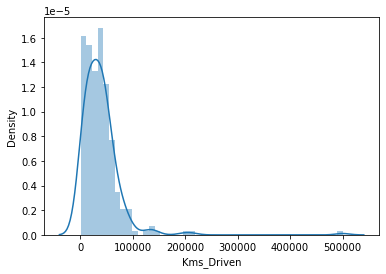

C:\Users\91721\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Owner
7.933135275949728


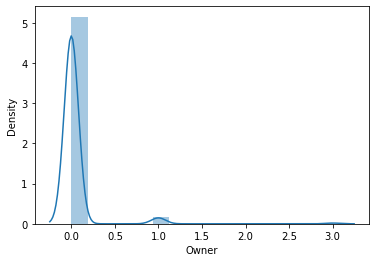

In [48]:
for col in cars_num:
    print(col)
    print(skew(cars_num[col]))
    plt.figure()
    sns.distplot((cars_num[col]))# displot show bell curve
    plt.show()#use for loop to find skewness for all data in cars_num

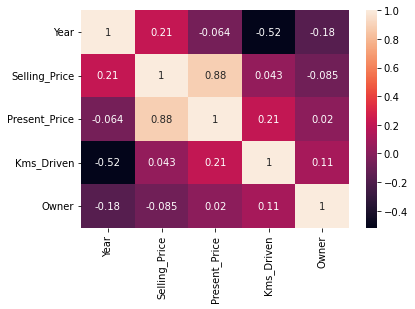

In [49]:
sns.heatmap(cars_num.corr(),annot=True)
plt.show()# it show correlation , high correlation means high skewness

In [50]:
cars_num['Selling_Price']=np.sqrt(cars_num['Selling_Price'])# apply which has bad correlation,

C:\Users\91721\AppData\Local\Temp/ipykernel_8868/518263262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_num['Selling_Price']=np.sqrt(cars_num['Selling_Price'])# apply which has bad correlation,


In [51]:
skew(cars_num['Selling_Price'])# we see low skewness as compare to above graph of skewness

0.8109149601230343

In [52]:
cars_num['Present_Price']=np.sqrt(cars_num['Present_Price'])
skew(cars_num['Present_Price'])

C:\Users\91721\AppData\Local\Temp/ipykernel_8868/3670659447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_num['Present_Price']=np.sqrt(cars_num['Present_Price'])


0.8822000588628507

Merge Categorical numerical column

In [53]:
cars_new=pd.concat([cars_num,cars_cat],axis=1)
cars_new.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name,Fuel_Type,Seller_Type,Transmission
0,2014,1.830301,2.364318,27000,0,90,2,0,1
1,2013,2.179449,3.088689,43000,0,93,1,0,1
2,2017,2.692582,3.138471,6900,0,68,2,0,1
3,2011,1.688194,2.037155,5200,0,96,2,0,1
4,2014,2.144761,2.621068,42450,0,92,1,0,1


Data normalization and scalling

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
mx=MinMaxScaler()

In [56]:
for col in cars_new:
    mx=MinMaxScaler()
    cars_new[col]=mx.fit_transform(cars_new[[col]])# using this we got value between 0 to 1

In [57]:
cars_new.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name,Fuel_Type,Seller_Type,Transmission
0,0.733333,0.270377,0.198586,0.053053,0.0,0.927835,1.0,0.0,1.0
1,0.666667,0.332727,0.278563,0.085085,0.0,0.958763,0.5,0.0,1.0
2,0.933333,0.424360,0.284060,0.012813,0.0,0.701031,1.0,0.0,1.0
3,0.533333,0.245000,0.162464,0.009409,0.0,0.989691,1.0,0.0,1.0
4,0.733333,0.326532,0.226934,0.083984,0.0,0.948454,0.5,0.0,1.0


Standard Scaler

In [58]:
from sklearn.preprocessing import StandardScaler # we apply this if minmaxscaler is not applied

In [59]:
for col in cars_new:
    ss=StandardScaler()
    cars_new[col]=ss.fit_transform(cars_new[[col]])
    # here we got positive and negative values

In [60]:
cars_new.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name,Fuel_Type,Seller_Type,Transmission
0,0.176371,-0.028589,-0.049109,-0.283338,-0.166782,1.091205,0.521601,-0.770675,0.404619
1,-0.167226,0.296996,0.475540,0.108683,-0.166782,1.206200,-1.764750,-0.770675,0.404619
2,1.207162,0.775497,0.511597,-0.775814,-0.166782,0.247915,0.521601,-0.770675,0.404619
3,-0.854420,-0.161104,-0.286068,-0.817466,-0.166782,1.321194,0.521601,-0.770675,0.404619
4,0.176371,0.264648,0.136851,0.095207,-0.166782,1.167868,-1.764750,-0.770675,0.404619


Visualization

Scatter plot,  is useful to display the correlation between two numerical data values or two data sets.

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

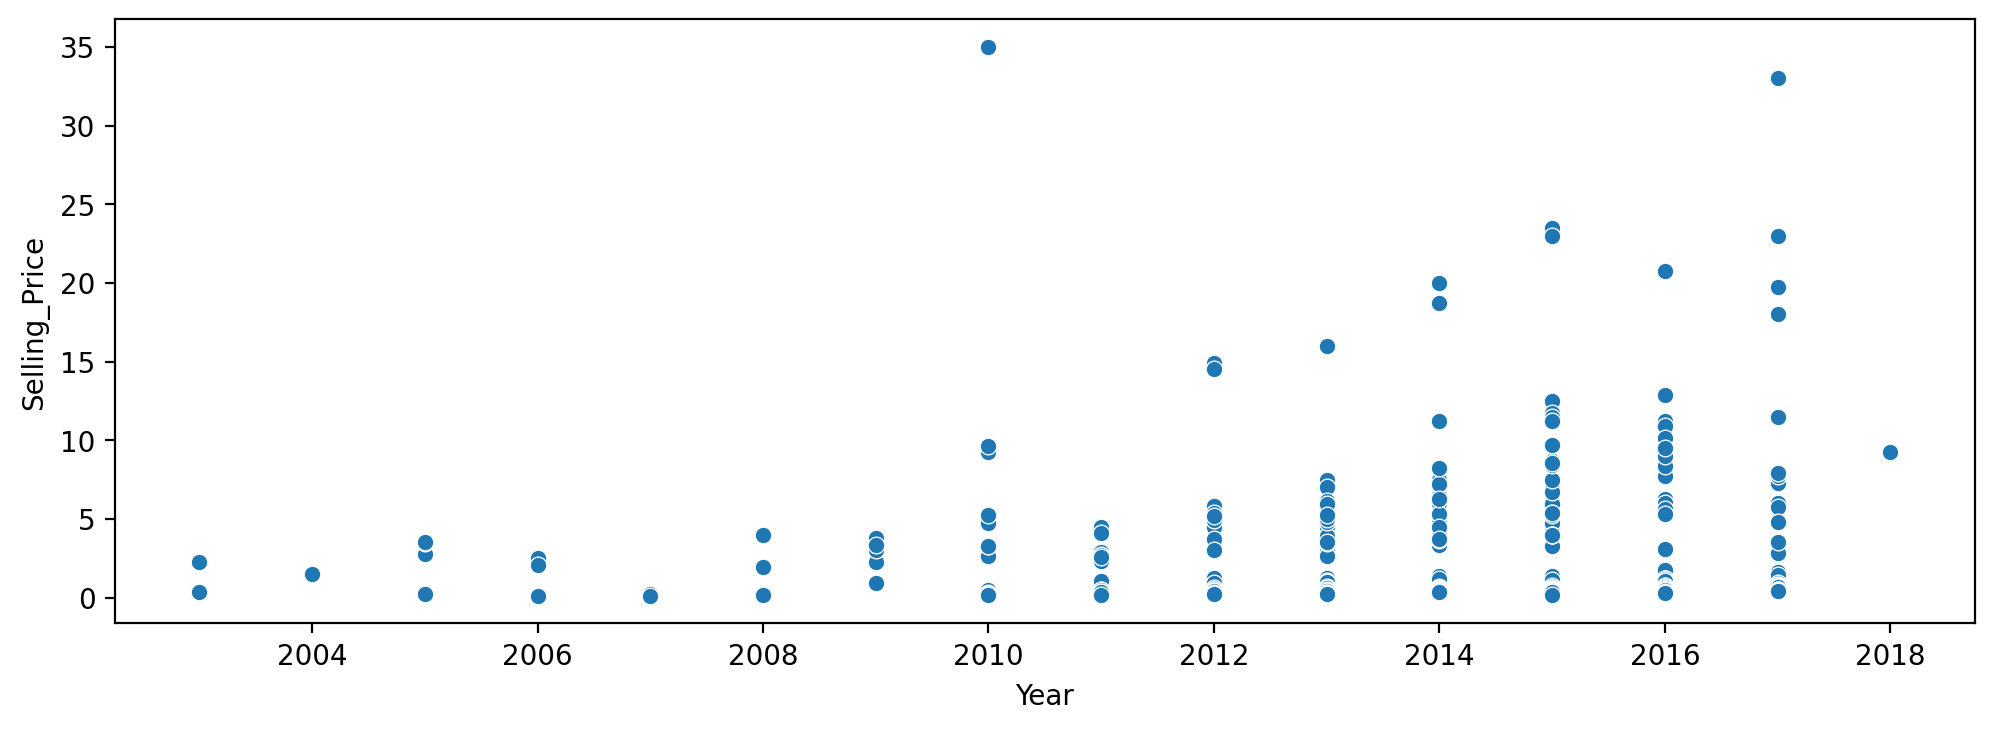

In [61]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(x='Year',y='Selling_Price',data=cars_dataset)

#pair plot,A pairs plot allows us to see both distribution of single variables and relationships between two variables

<Figure size 2400x800 with 0 Axes>

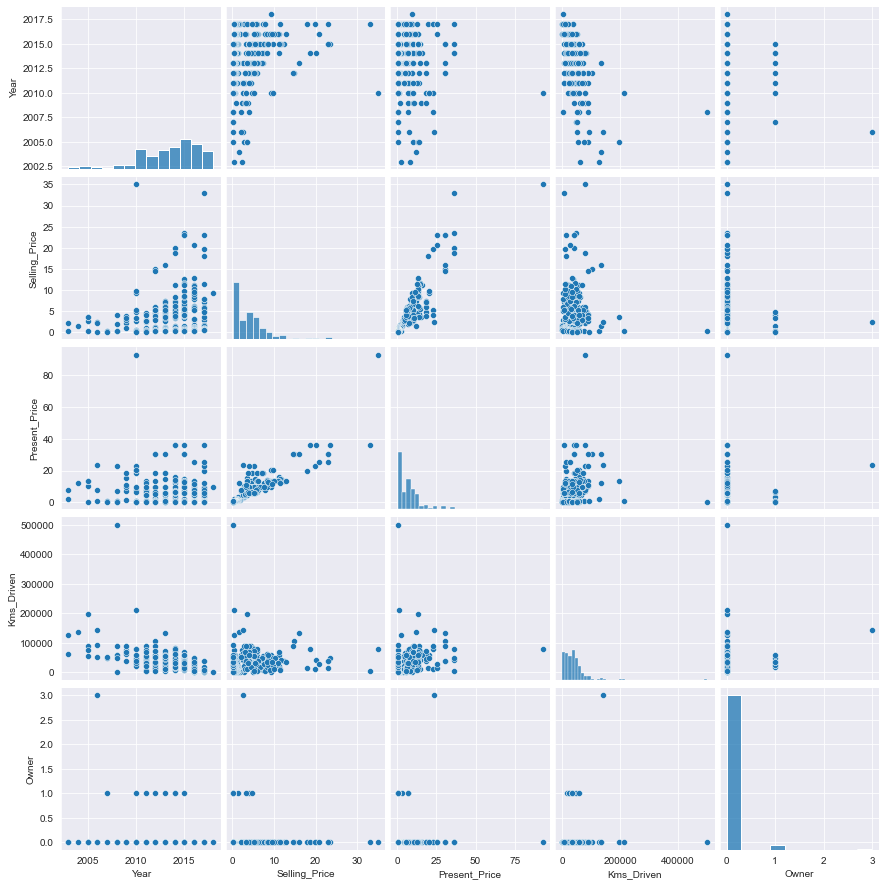

In [62]:
plt.figure(figsize=(12,4),dpi=200)
sns.set_style('darkgrid')
sns.pairplot(cars_dataset);

 lineplot,The main use case for line plots is time series analysis. It shows how the value of a variable changes over time.

C:\Users\91721\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

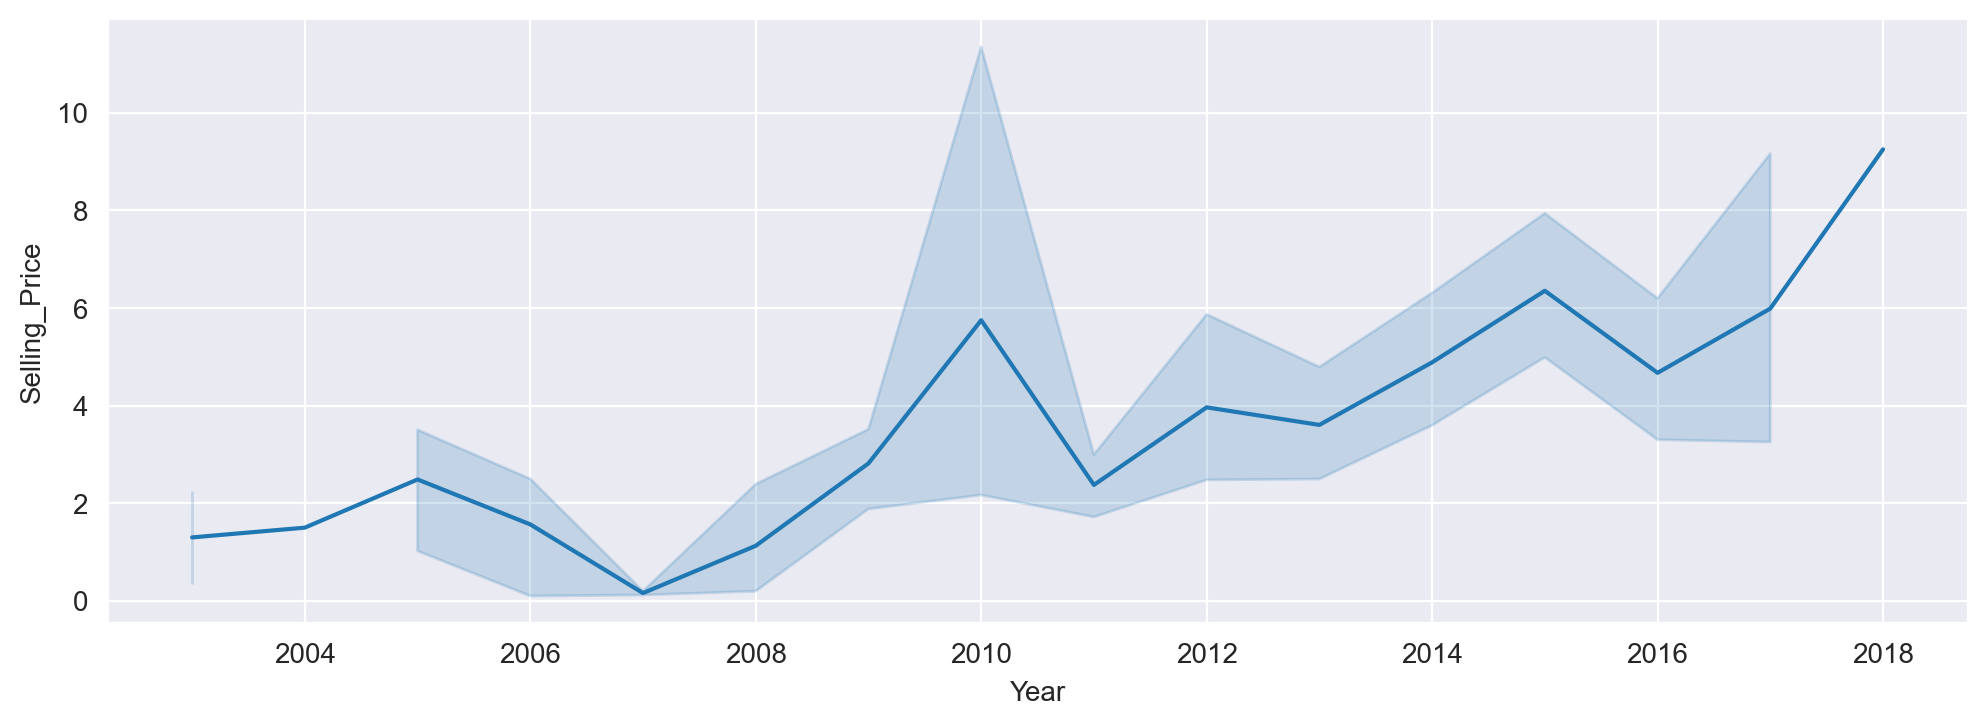

In [63]:
plt.figure(figsize=(12,4),dpi=200)
sns.lineplot(cars_dataset.Year,cars_dataset.Selling_Price)

<AxesSubplot:xlabel='Selling_Price', ylabel='Count'>

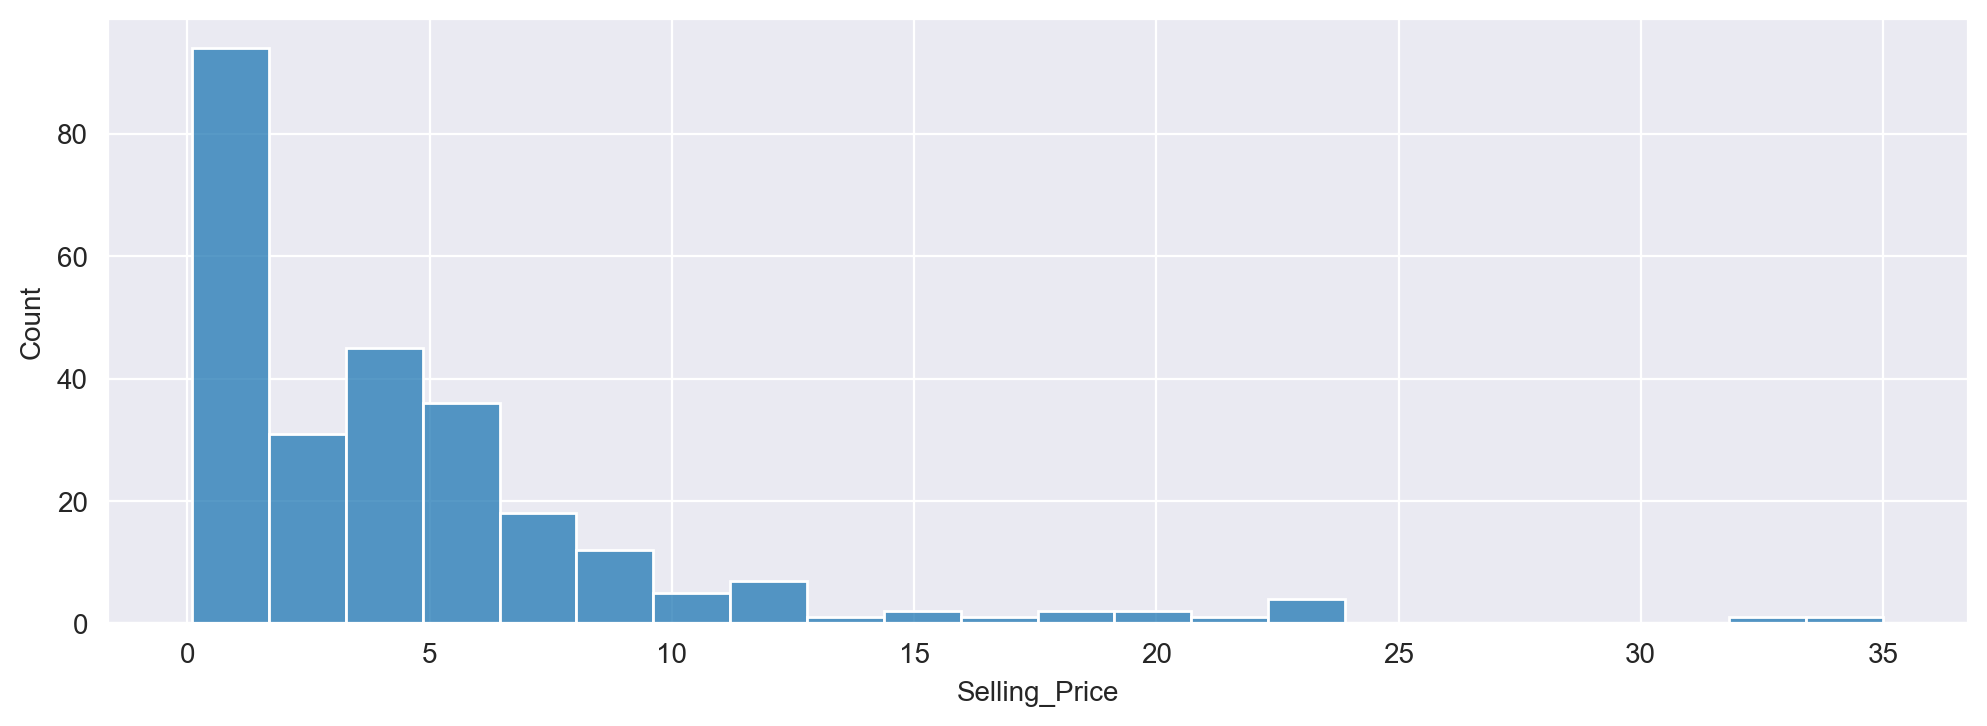

In [64]:
#histogram,It does the grouping.used to show frequency
plt.figure(figsize=(12,4),dpi=200)
sns.set_style('darkgrid')
sns.histplot(cars_dataset.Selling_Price)

 bar plot, A bar graph is a graphical representation of data in which we can highlight the category with particular shapes like a rectangle.

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

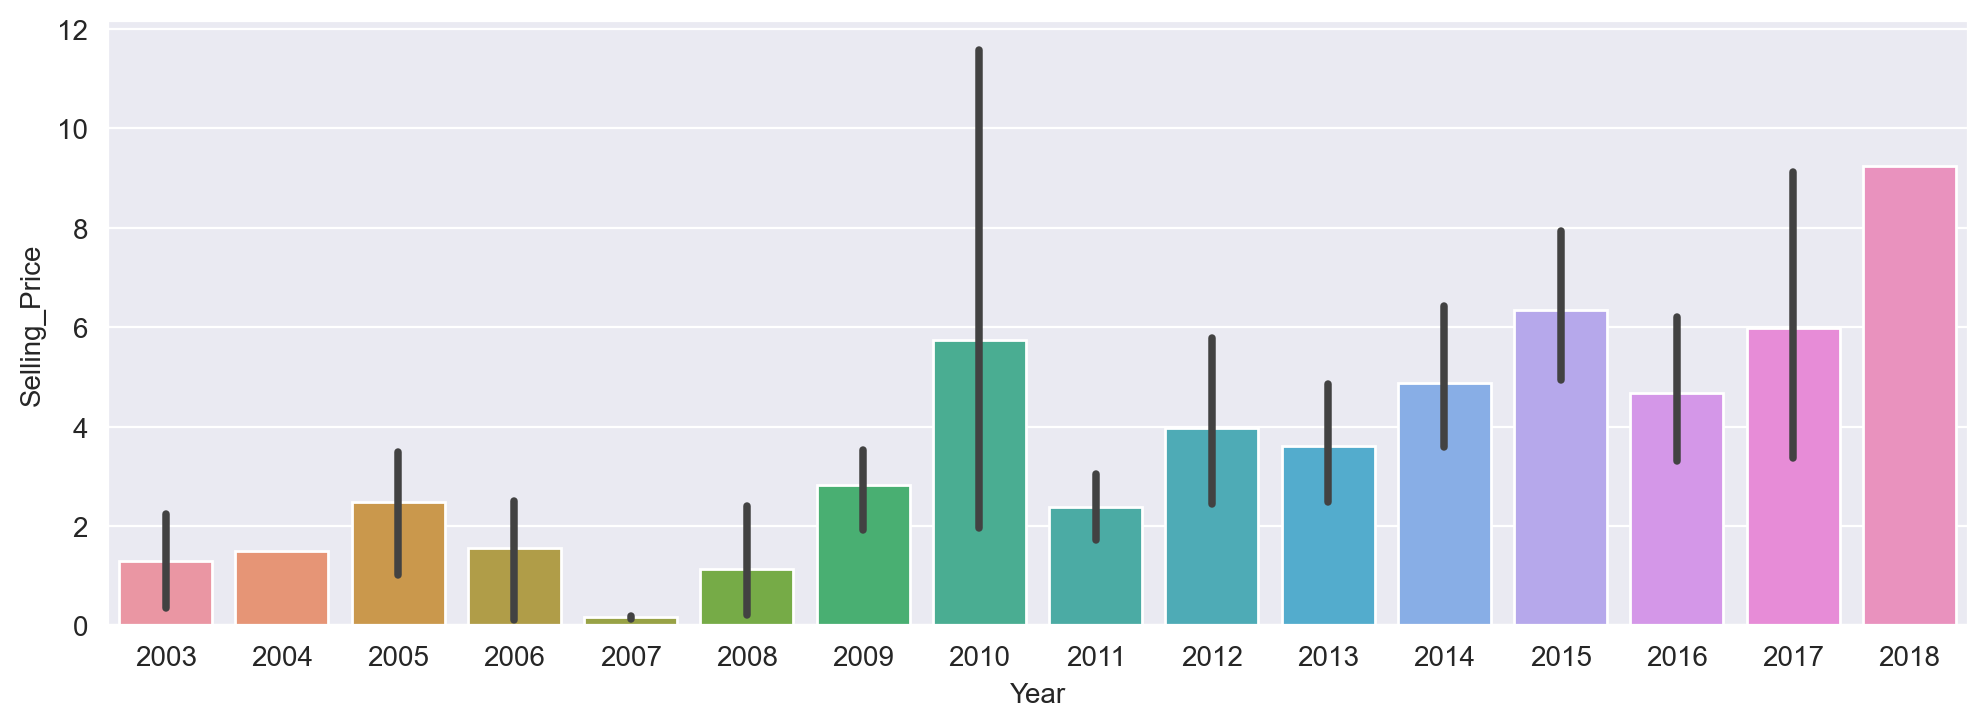

In [65]:
plt.figure(figsize=(12,4),dpi=200)
sns.set_style('darkgrid')
sns.barplot(x='Year',y='Selling_Price',data=cars_dataset)


In [66]:
# checking the distribution of categorical data
print(cars_dataset.Fuel_Type.value_counts())
print(cars_dataset.Seller_Type.value_counts())
print(cars_dataset.Transmission.value_counts())

Petrol    205
Diesel     56
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        165
Individual     98
Name: Seller_Type, dtype: int64
Manual       226
Automatic     37
Name: Transmission, dtype: int64


In [67]:
# encoding fuel type column
cars_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding seller type column
cars_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding transmission column
cars_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [68]:
cars_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [69]:
X=cars_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=cars_dataset['Selling_Price'] # separate x and y

In [70]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [71]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 263, dtype: float64

 test_size=0.1 means test size is 10% and remaining 90% for training random_state=2 means we will get the output is same for any machine

In [72]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression. Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable.

The linear regression model provides a sloped straight line representing the relationship between the variables.

In [73]:
#loading the linear regression model
lin_reg_model = LinearRegression()# we store in object because LinearRegression this is class


#:train model

lin_reg_model.fit(X_train,Y_train)


LinearRegression()

In [74]:
# prediction on training data
training_data_prediction=lin_reg_model.predict(X_train)

In [75]:
# R squared error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error :",error_score)# for regression we use r squared error,error between y train and training_data_prediction 

R squared Error : 0.8869354609297895


here we see the not much distance between the values most of the values are closer to each other, once the price value increases is some gap because price of the cars are in the range or within the range 10 there are very less values greater than 10 see above Present_Price (x), see here the values are as flows are very close so that means the values predicted by our machine learning model is very close to the original sold price

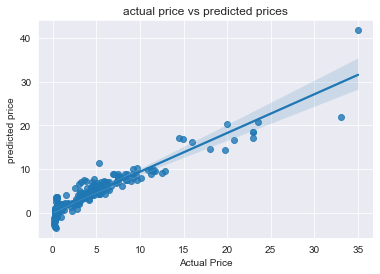

In [76]:
# visualize actual price and predicted price , train data prediction

sns.regplot(x=Y_train,y=training_data_prediction)

plt.xlabel("Actual Price")
plt.ylabel('predicted price')
plt.title("actual price vs predicted prices")
plt.show()
# line is predicted value

In [77]:
# prediction on test data
test_data_prediction=lin_reg_model.predict(X_test)

In [78]:
# R squared error for test data
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared Error :",error_score)# for regression we use r squared error

R squared Error : 0.8264631210655443


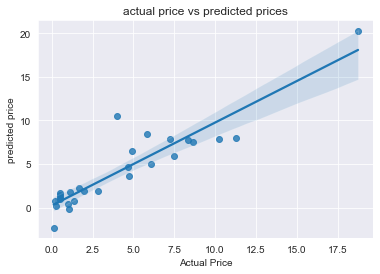

In [79]:
# visualize the actual prices and predicted prices, this is test data prediction
# test data is 10% so we have 300 values so for testing 30 values
# line is predicted value
sns.regplot(x=Y_test,y=test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel('predicted price')
plt.title("actual price vs predicted prices")
plt.show() 

lasso regression

In [82]:
# loading the lasso regression model
lass_reg_model = Lasso()

In [83]:
lass_reg_model.fit(X_train,Y_train)# fit xtrain and ytrain

Lasso()

In [84]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [85]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8472921289130384


Visualize the actual prices and Predicted prices on training data

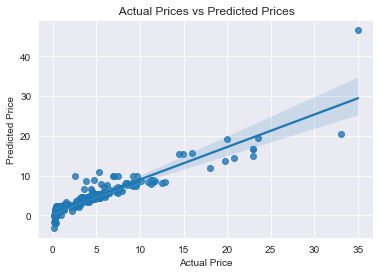

In [90]:
sns.regplot(x=Y_train,y=training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [87]:
# prediction on Testing data
test_data_prediction = lass_reg_model.predict(X_test)

In [88]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8292417376779084


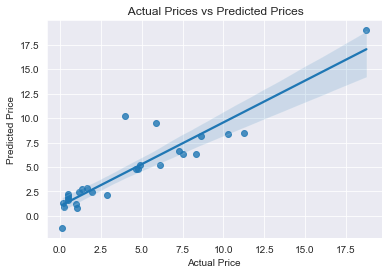

In [92]:
#Visualize the actual prices and Predicted prices on testing data
sns.regplot(x=Y_test,y=test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

so in case of linear regression predicting value is close but in lasso regression its much closer 